# Лабораторная работа №1
### Студент: Кузьмин Д.И.
### Группа 9382

### Цель работы - изучить возможности библиотек Python для решения задач цифровой обработки сигналов

### Задание
1. Освоить Jupyter Notebook
2. Выполнить загрузку аудио сигнала и построить огибающую(график)
3. Фильтрация (выбрать один из 4 основных типов фильтров). Получить фильтрованный сигнал.
4. Детектор сигнал/шум. Получить сигнал после детектирования.
5. Эффект "Эхо". Получить сигнал после работы аудио-эффекта.
6. Эффект "Distortion"(классический вариант). Получить сигнал после работы аудио-эффекта

In [1]:
from scipy.io import wavfile
from matplotlib import pyplot as plt
import numpy as np
import IPython.display as ipd

In [2]:
samplerate, data = wavfile.read('audio.wav')

/opt/sagemath-9.2/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.
/opt/sagemath-9.2/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  """Entry point for launching an IPython kernel.


## Исходный сигнал

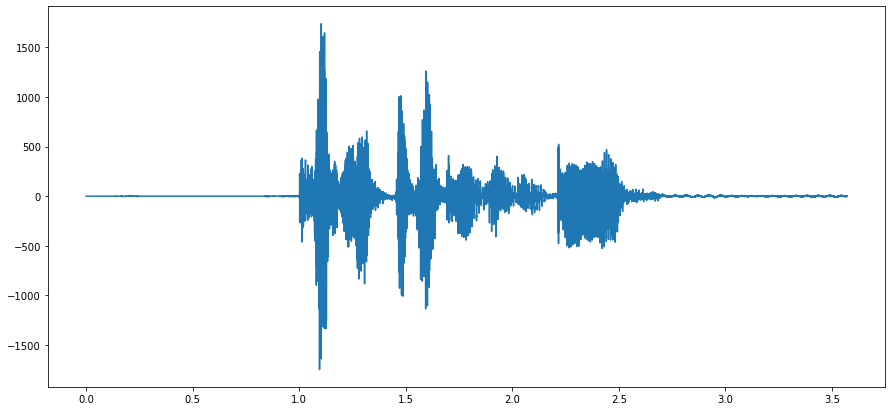

In [3]:
length = data.shape[0]/samplerate
time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(15, 7))
plt.plot(time, data[:])
plt.show()

In [4]:
ipd.Audio('audio.wav')

## Построение огибающей

1142


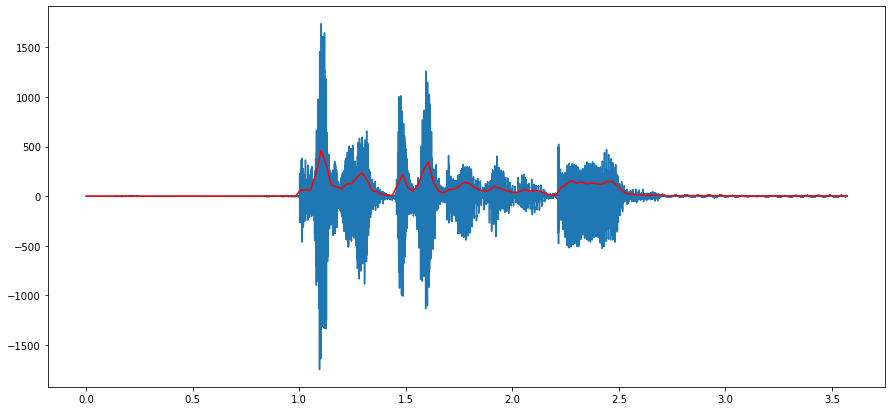

In [5]:
import csv
from math import floor
big_n = len(data[:])
small_n = 150
m = floor(big_n/small_n)
print(m)
ys = []
for j in range(0, small_n):
    tmp = [abs(data[:][k]) for k in range(m*j, m*j + m)]
    ys.append(sum(tmp)/m)
plt.figure(figsize=(15, 7))
xs = np.linspace(0., length , len(ys))
plt.plot(time, data[:])
plt.plot(xs, ys, color='red')
plt.show()

## Фильтр нижних частот

In [6]:
from scipy import signal
from scipy.io.wavfile import write
def filt_lowpass(data):
    wn = 2 * 600/samplerate
    b,a = signal.butter(1, wn, 'lowpass')
    newdata = signal.filtfilt(b, a, data)
    return newdata

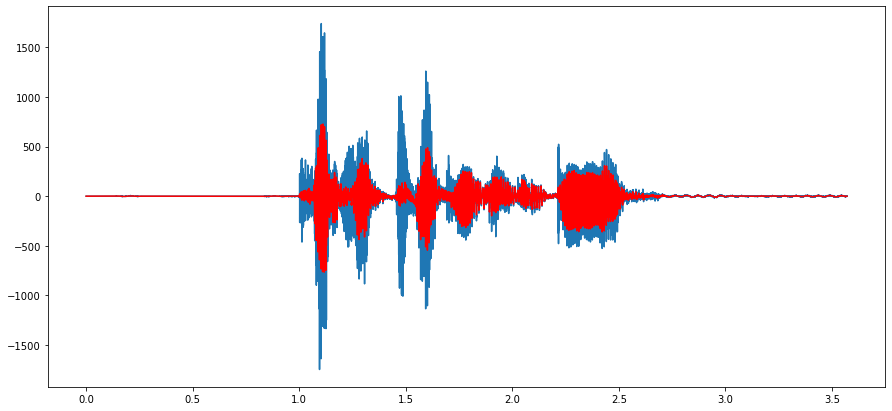

In [7]:
ndata = filt_lowpass(data)
write("lowpass.wav", samplerate, ndata.astype(np.int16))
plt.figure(figsize=(15, 7))
plt.plot(time, data)
plt.plot(time, ndata, color='red')
plt.show()

In [8]:
ipd.Audio('lowpass.wav')

## Амплитудный детектор сигнал/шум

16.60113320729174


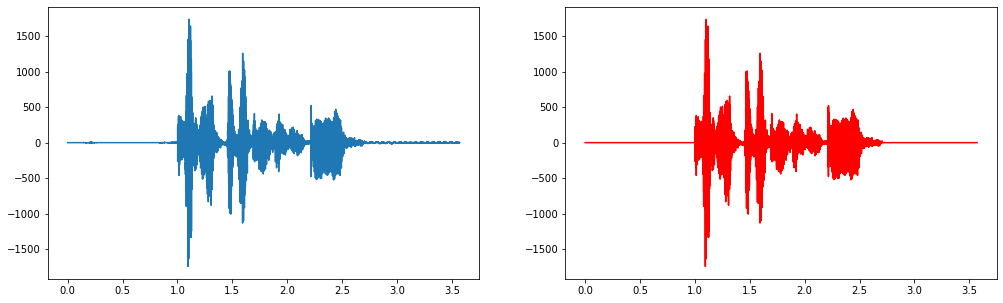

In [9]:
import math
mid = np.mean([abs(d) for d in data])
alpha = 0.35
th = alpha * mid
noise = np.array(data, copy=True)
k = 300
n = len(data)
num = 0
points = []
for i in range(0, n):
    if abs(data[i]) < th: num+=1
    else: num = 0
    if num >= k:
        for j in range (i - k + 1, i):
            noise[j] = 0
print(th)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,5))
ax1.plot(time, data)
ax2.plot(time, noise, color ='red')
write("noise.wav", samplerate, noise)
plt.show() 

Видно, что на графике справа последняя половина секунды записи выглядит как прямая, тогда как на обычном графике в этом же месте видны шумы

In [10]:
ipd.Audio(filename = 'noise.wav')

## Эхо (простейший ревербератор)

In [34]:
import math
start = 6500
delays = [start] + [start*(2**((1 - x)/8)) for x in range(2, 9)]
delays = list(map(int, delays))
coefs = [0.9 / (2**x) for x in range (0, 8)]
echo = np.zeros(len(data))
delay = start
for d, c in zip(delays, coefs):
    for j in range(0, len(data) - delay):
        echo[j + delay] += data[j] * c
    delay += d



In [35]:
echo_filtered = filt_lowpass(echo)

In [36]:
gamma_coeff = 0.6
final_echo = np.array(data, copy=True)
for i in range(0, len(echo)):
    final_echo[i] += echo_filtered[i]* gamma_coeff
write("echo.wav", samplerate,final_echo)

In [37]:
ipd.Audio('echo.wav')

## Классический Distortion

In [15]:
def sign(a):
    if a == 0: 
        return 0
    return int(a/abs(a))

In [16]:
theta = np.mean([abs(d) for d in data])*5
max_coeff = 700
distorted = np.array(data, copy=True)
for i in range(0, len(distorted)):
    if (abs(distorted[i]) > theta):
        distorted[i] = max_coeff * sign(distorted[i])
wavfile.write('distorted.wav', samplerate, distorted)

In [17]:
ipd.Audio('distorted.wav')